# **Arterial hypertension (AHT) - Part I**
# **Exploratory Data Analysis (EDA)**

The dataset used in this project includes data of several laboratory measurements obtained from outpatients: systolic and diastolic pressures (day & nighttime), pulse pressures, arterial physical parameters, and associated characteristics.

In [1]:
# 🚫 Suppress DeprecationWarnings and other noisy system warnings in Colab
import warnings, os, sys

# Hide all warnings (including DeprecationWarnings)
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

# Optional: mute stderr temporarily (for jupyter_client / Colab internals)
class NullIO:
    def write(self, _): pass
    def flush(self): pass

sys.stderr = NullIO()


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [3]:
# Read the dataset
df = pd.read_csv('HTA_modified.csv', encoding='latin-1', sep=';', decimal=',')


## **Data Preprocessing**
As part of the data analysis workflow, the following steps included:

* Checking data types → data inspection
* Renaming column names → data formatting
* Deleting irrelevant columns
* Deletion of sensitive data → data anonymization

In [4]:
# Number of rows and columns
df.shape

(628, 51)

The dataframe consists of 628 rows and 51 columns.

In [5]:
# A glimpse of the columns names and types
df.dtypes

,0
patient,int64
Nom,object
Fecha,object
m_PdPs/ Pendientede la regresion de Presion Diastolica vs Sistlica,float64
b_PdPs /Ordenada al origen de dicha regresion,float64
r_2_PdPs / coeff de pearson de la regresion,float64
m_PPPs / pendiente de la recta de regresion de Presion Pulsatil vs Presion Sistolica,float64
b_PPPs /ordenada alorigen de la recta de regresion de Presion Pulsatil vs Presion Sistolica,float64
r_2_PPPs,float64
m_PPPd/ Pendiente de la recta de regresion de Presion Pulsatil vs Presion Diast«lica,float64


**Removal of Identifiers**

The variables 'patient' and 'name' were removed from the dataset. These columns contain personally identifiable information (PII) that must not be used in the analysis to ensure compliance with privacy regulations (GDPR, General Data Protection Regulation).

Additionally, they do not provide analytical or clinical value and could bias models by introducing unique identifiers rather than meaningful patterns.

More about GDPR data regulations in: https://gdpr-info.eu/


In [6]:
# Deletion of sensible data (patient ID and name)
# List of columns to drop
columns_to_drop = ['patient', 'Nom']

# Drop the specified columns inplace
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# A new inspection to the variables and types
df.dtypes

,0
Fecha,object
m_PdPs/ Pendientede la regresion de Presion Diastolica vs Sistlica,float64
b_PdPs /Ordenada al origen de dicha regresion,float64
r_2_PdPs / coeff de pearson de la regresion,float64
m_PPPs / pendiente de la recta de regresion de Presion Pulsatil vs Presion Sistolica,float64
b_PPPs /ordenada alorigen de la recta de regresion de Presion Pulsatil vs Presion Sistolica,float64
r_2_PPPs,float64
m_PPPd/ Pendiente de la recta de regresion de Presion Pulsatil vs Presion Diast«lica,float64
b_PPPd,float64
r_2_PPPd,float64


The first 15 columns refer to previously calculated values for linear regression, such slope and intercept values. These variables are irrelevant for further exploratory analysis and will be removed from the dataset.

In [8]:
# Deletion of 15 irrelevant columns
df.columns[1:16]

Index(['m_PdPs/ Pendientede la regresion de Presion Diastolica vs Sistlica',
       'b_PdPs /Ordenada al origen de dicha regresion',
       'r_2_PdPs / coeff de pearson de la regresion',
       'm_PPPs / pendiente de la recta de regresion de Presion Pulsatil vs Presion Sistolica',
       'b_PPPs /ordenada alorigen de la recta de regresion de Presion Pulsatil vs Presion Sistolica',
       'r_2_PPPs',
       'm_PPPd/ Pendiente de la recta de regresion de Presion Pulsatil vs Presion Diast«lica',
       'b_PPPd', 'r_2_PPPd',
       'm_PdPs_Jour/de la recta de regresion de Presion Diastyolica vs Presion Sistolica de DIA',
       'b_PdPs_Jour/ ordenada de la recta de regresion de Presion Diastolica vs Presion Sistolica de Dia',
       'r_2_PdPs_Jour',
       'm_PdPs_Nuit/Pendiente de la recta de regresion de Presion Diastolica vs Presion Sistolica de Noche',
       'b_PdPs_Nuit/ Ordenada  de la recta de regresion de Presion Diastolica vs Presion Sistolica de Noche',
       'r_2_PdPs_Nuit'],

In [9]:
# Select the columns to drop
subset_df = df.iloc[:, 1:16]

# Preview of subset of irrelevant columns to drop
subset_df.head(3)



,m_PdPs/ Pendientede la regresion de Presion Diastolica vs Sistlica,b_PdPs /Ordenada al origen de dicha regresion,r_2_PdPs / coeff de pearson de la regresion,m_PPPs / pendiente de la recta de regresion de Presion Pulsatil vs Presion Sistolica,b_PPPs /ordenada alorigen de la recta de regresion de Presion Pulsatil vs Presion Sistolica,r_2_PPPs,m_PPPd/ Pendiente de la recta de regresion de Presion Pulsatil vs Presion Diast«lica,b_PPPd,r_2_PPPd,m_PdPs_Jour/de la recta de regresion de Presion Diastyolica vs Presion Sistolica de DIA,b_PdPs_Jour/ ordenada de la recta de regresion de Presion Diastolica vs Presion Sistolica de Dia,r_2_PdPs_Jour,m_PdPs_Nuit/Pendiente de la recta de regresion de Presion Diastolica vs Presion Sistolica de Noche,b_PdPs_Nuit/ Ordenada de la recta de regresion de Presion Diastolica vs Presion Sistolica de Noche,r_2_PdPs_Nuit
0,0.56,9.23,0.68,0.44,-9.23,0.59,-0.18,54.08,-0.19,0.36,33.90,0.51,0.68,-6.26,0.78
1,0.61,4.32,0.81,0.39,-4.32,0.65,0.06,40.65,0.08,0.57,10.93,0.80,0.41,26.71,0.53
2,0.48,24.70,0.64,0.52,-24.70,0.67,-0.14,52.87,-0.13,0.19,64.37,0.35,0.75,-10.10,0.80


In [10]:
subset_df.shape

(628, 15)

In [11]:
# Get the list of columns to delete
columns_to_drop = subset_df.columns.tolist()

# Drop the identified columns from original dataframe df
df = df.drop(columns=columns_to_drop, axis=1)


In [12]:
# New size of dataframe to work with
df.shape


(628, 34)

After deleting sensitive data and irrelevant columns, now the dataframe consists of 628 rows and 34 features.

In [13]:
df.columns

Index(['Fecha', 'PsMax / Sistlica Mxima',
       'Pd_PsMax /Presin Diastlica cuandhay Sistlica Maxima',
       'PsMin/ Presin sistlica mnima',
       'Pd_PsMin/ Presin Diastlica cuando Sistlica mnima', 'meanPsDia',
       'meanPPDia', 'meanPsNoche', 'meanPPNoche', 'Psmean', 'Pdmean', 'PPmean',
       'AASI/ Ambulatory Arterial Stiffnes Index 1 - pendiente de la regresion Pd/Ps',
       'AASI aprox', 'PP_PsMax/ Pulstil con Ps max', 'PP_PsMin',
       'PsDia-PsNoche ', 'PPDia-PPNoche',
       'PP_PsMax-PP_PsMin/diferencia entre pulsatiles segn sea Ps Max y Min',
       'Sexe', 'Age',
       'IMTCarD/Espesor de la capa Arterial ntima media de la cartida derecha',
       'DiaDCarD/ Dimetro de la cartida derecha en Distole',
       'IMTCarG / Espesor de la capa Arterial ntima media de la cartida izquierda',
       'DiaDCarG/ Dimetro de la cartida Izquierda en Distole',
       'VOP/ Velocidad de Onda de Pulso', 'Compliance [cm/mmHg]',
       'Pm / Presin media', 'Cis

Several column names are not descriptive enough and need to be renamed to improve clarity and interpretability.

In [14]:
 # Rename columns names

df.rename(columns={'Fecha':'Date',
                   'PsMax / Sistlica Mxima':'SP Max',
                   'Pd_PsMax /Presin Diastlica cuandhay Sistlica Maxima':'DP w/SP Max',
                   'PsMin/ Presin sistlica mnima':'SP Min',
                   'Pd_PsMin/ Presin Diastlica cuando Sistlica mnima':'DP w/SP Min',
                   'meanPsDia':'Mean SP daytime',
                   'meanPPDia':'Mean Pulse Pressure daytime',
                   'meanPsNoche':'Mean SP night time',
                   'meanPPNoche':'Mean Pulse Pressure night time',
                   'Psmean':'Mean SP',
                   'Pdmean':'Mean Diastolic Pressure',
                   'PPmean':'Mean Pulse Pressure',
                   'AASI/ Ambulatory Arterial Stiffnes Index 1 - pendiente de la regresion Pd/Ps':'AASI slope DP/SP regression',
                   'AASI aprox':'Aproximate AASI',
                   'PP_PsMax/ Pulstil con Ps max':'Pulse Pressure w/SP Max',
                   'PP_PsMin':'Pulse Pressure w/SP Min',
                   'PsDia-PsNoche ':'SP day/night difference',
                   'PPDia-PPNoche':'Pulse Pressure day/night difference',
                   'PP_PsMax-PP_PsMin/diferencia entre pulsatiles segn sea Ps Max y Min':'Pulse Pressure of SP Max/Min difference',
                   'Sexe':'Sex',
                   'Age':'Age',
                   'IMTCarD/Espesor de la capa Arterial \x92ntima media de la car\x97tida derecha':'IMT right carotide',
                   'DiaDCarD/ Di\x87metro de la car\x97tida derecha en Di\x87stole':'Diastolic diameter right carotide',
                   'IMTCarG / Espesor de la capa Arterial \x92ntima media de la car\x97tida izquierda':'IMT left carotide',
                   'DiaDCarG/ Di\x87metro de la car\x97tida Izquierda en Di\x87stole':'Diastolic diameter left carotide',
                   'VOP/ Velocidad de Onda de Pulso':'Pulse wave velocity(PWV)',
                   'Compliance [cm/mmHg]':'Compliance',
                   'Pm / Presi\x97n media':'Mean Pressure',
                   'Ciso/ Compliance isob\x87rica':'Isobaric compliance',
                   'HTA':'AHT',
                   'Tension':'Tension',
                   'AASI dia':'AASI daytime',
                   'AASI noche':'AASI night time',
                   'Dippers':'Dipper'

                   }, inplace=True)

In [15]:
# Convert the `Date` column to datetime.
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [16]:
# Add new columns to df: 'Year', 'Month' and 'Week'
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Month txt'] = df.Date.dt.month_name()
df['Week'] = df.Date.dt.isocalendar().week
df.head()

,Date,SP Max,DP w/SP Max,SP Min,DP w/SP Min,Mean SP daytime,Mean Pulse Pressure daytime,Mean SP night time,Mean Pulse Pressure night time,Mean SP,...,Isobaric compliance,AHT,Tension,AASI daytime,AASI night time,Dipper,Year,Month,Month txt,Week
0,2001-06-12,153,83,88,48,116.23,40.41,112.23,42.31,114.7,...,2.68,0,402.89,0.64,0.32,0,2001,6,June,24
1,2001-06-16,173,103,110,76,133.64,46.32,122.08,45.42,129.7,...,NaN,1,NaN,0.43,0.59,0,2001,6,June,24
2,2001-06-22,163,95,101,64,130.88,41.79,120.00,40.32,127.0,...,5.68,1,556.62,0.81,0.25,0,2001,6,June,25
3,2001-06-28,130,66,79,48,99.39,42.00,107.38,48.96,102.3,...,3.22,0,348.28,0.42,0.73,0,2001,6,June,26
4,2001-07-07,183,106,118,70,149.47,47.98,143.27,53.65,147.4,...,3.12,1,520.15,0.69,0.36,0,2001,7,July,27


In [17]:
df.dtypes

,0
Date,datetime64[ns]
SP Max,int64
DP w/SP Max,int64
SP Min,int64
DP w/SP Min,int64
Mean SP daytime,float64
Mean Pulse Pressure daytime,float64
Mean SP night time,float64
Mean Pulse Pressure night time,float64
Mean SP,float64


In [18]:
# Data type transformation of some columns to 'int32' or 'int64'

# df['Year'] = df['Year'].astype('int64')
# df['Month'] = df['Month'].astype('int64')
df['Week'] = df['Week'].astype('int32')

In [19]:
# Drop column 'Date' and return a new dataframe df
df = df.drop('Date', axis=1)

df.shape


(628, 37)

The dataframe consists of 628 rows and 37 columns.

In [20]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [21]:
# Preview of the first five samples of the df
df.head(5)

,SP Max,DP w/SP Max,SP Min,DP w/SP Min,Mean SP daytime,Mean Pulse Pressure daytime,Mean SP night time,Mean Pulse Pressure night time,Mean SP,Mean Diastolic Pressure,Mean Pulse Pressure,AASI slope DP/SP regression,Aproximate AASI,Pulse Pressure w/SP Max,Pulse Pressure w/SP Min,SP day/night difference,Pulse Pressure day/night difference,Pulse Pressure of SP Max/Min difference,Sex,Age,IMT right carotide,Diastolic diameter right carotide,IMT left carotide,Diastolic diameter left carotide,Pulse wave velocity(PWV),Compliance,Mean Pressure,Isobaric compliance,AHT,Tension,AASI daytime,AASI night time,Dipper,Year,Month,Month txt,Week
0,153,83,88,48,116.23,40.41,112.23,42.31,114.7,73.6,41.1,0.44,0.46,70,40,4,-2,30,0,62,0.47,4.96,0.53,4.89,10.30,3.07,87.3,2.68,0,402.89,0.64,0.32,0,2001,6,June,24
1,173,103,110,76,133.64,46.32,122.08,45.42,129.7,83.7,46.0,0.39,0.57,70,34,12,1,36,1,55,NaN,NaN,NaN,NaN,11.22,NaN,99.0,NaN,1,NaN,0.43,0.59,0,2001,6,June,24
2,163,95,101,64,130.88,41.79,120.00,40.32,127.0,85.7,41.3,0.52,0.50,68,37,11,1,31,1,40,0.42,5.72,0.47,5.26,7.84,5.71,99.5,5.68,1,556.62,0.81,0.25,0,2001,6,June,25
3,130,66,79,48,99.39,42.00,107.38,48.96,102.3,57.8,44.5,0.60,0.65,64,31,-8,-7,33,0,74,0.76,6.92,0.69,6.62,9.98,4.43,72.6,3.22,0,348.28,0.42,0.73,0,2001,6,June,26
4,183,106,118,70,149.47,47.98,143.27,53.65,147.4,97.6,49.8,0.52,0.45,77,48,6,-6,29,1,58,0.66,7.25,0.73,6.65,12.75,2.73,114.2,3.12,1,520.15,0.69,0.36,0,2001,7,July,27


In [22]:
# Remove duplicate data across all columns
df.drop_duplicates(inplace=True)

## **Inspection of data distribution and outliers**




- A subset containing only numeric variables was created to support exploratory visualizations.

In [23]:
# Selection of numeric variables to create plots

numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
numeric_df.columns

Index(['SP Max', 'DP w/SP Max', 'SP Min', 'DP w/SP Min', 'Mean SP daytime',
       'Mean Pulse Pressure daytime', 'Mean SP night time',
       'Mean Pulse Pressure night time', 'Mean SP', 'Mean Diastolic Pressure',
       'Mean Pulse Pressure', 'AASI slope DP/SP regression', 'Aproximate AASI',
       'Pulse Pressure w/SP Max', 'Pulse Pressure w/SP Min',
       'SP day/night difference', 'Pulse Pressure day/night difference',
       'Pulse Pressure of SP Max/Min difference', 'Sex', 'Age',
       'IMT right carotide', 'Diastolic diameter right carotide',
       'IMT left carotide', 'Diastolic diameter left carotide',
       'Pulse wave velocity(PWV)', 'Compliance', 'Mean Pressure',
       'Isobaric compliance', 'AHT', 'Tension', 'AASI daytime',
       'AASI night time', 'Dipper', 'Year', 'Month', 'Week'],
      dtype='object')

In [24]:
# Improved data visualization by styling fonts and colors.

# pyfonts: a handy tool for easily loading and using fonts in Matplotlib, especially Google Fonts.
# pypalettes: helps you pick beautiful, consistent color schemes for your plots.

!pip install pyfonts
from pyfonts import load_google_font


In [25]:
!pip install pypalettes
from pypalettes import get_hex



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 7.7 MB/s eta 0:00:00


**Bar Plots**

Bar plots are used to visualize the frequency distribution of categorical variables. They provide a clear overview of how many observations belong to each category, help identify class imbalances, and highlight potential anomalies in the data.

This makes the dataset easier to interpret and supports decision-making during feature selection and preprocessing.

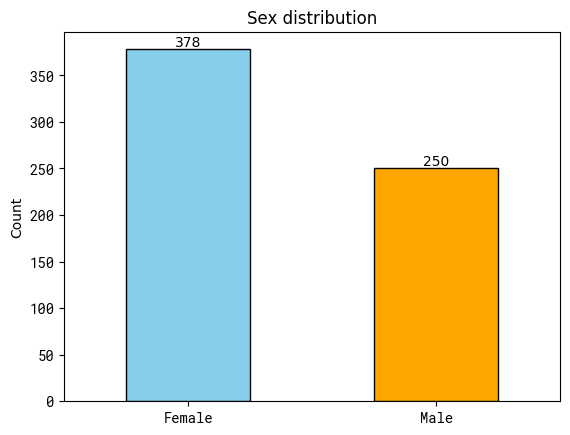

In [26]:
# Bar plots

# Count of each condition of dipper/nondipper
counts = numeric_df['Sex'].value_counts()

# Plot as bar chart
ax = counts.plot(kind='bar', color=['skyblue','orange'], edgecolor='black')
palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='8', font=font)
plt.xlabel('')
plt.title('Sex distribution')
plt.ylabel('Count')

# Replace x-axis labels
ax.set_xticklabels(['Female', 'Male'], rotation=0)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

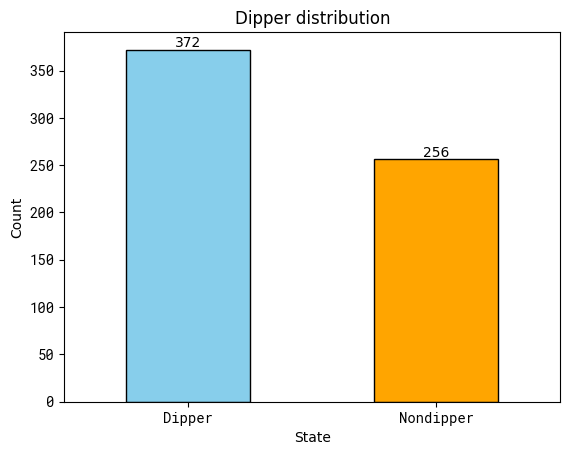

In [27]:
# Bar plots

# Count of each condition of dipper/nondipper
counts = numeric_df['Dipper'].value_counts()

# Plot as bar chart
ax = counts.plot(kind='bar', color=['skyblue','orange'], edgecolor='black')
palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='8', font=font)
plt.title('Dipper distribution')
plt.xlabel('State')
plt.ylabel('Count')

# Replace x-axis labels
ax.set_xticklabels(['Dipper', 'Nondipper'], rotation=0)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

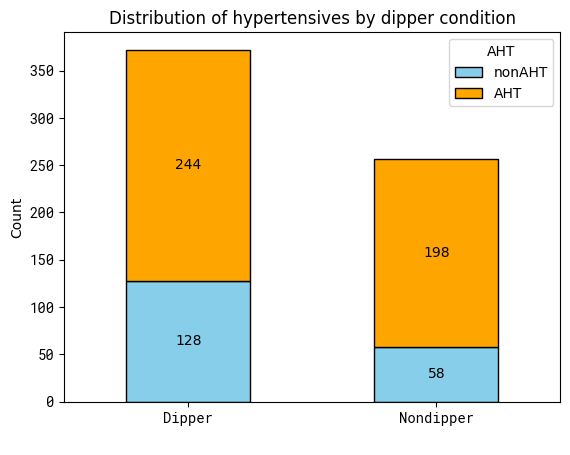

In [28]:
# Stacked plots
# Cross-tabulation
ct = pd.crosstab(numeric_df['Dipper'], numeric_df['AHT'])


# Replace index (x-axis labels) and columns (legend labels)
ct.index = ['Dipper', 'Nondipper']
ct.columns = ['nonAHT', 'AHT']

# Plot
ax = ct.plot(kind='bar', stacked=True, color=['skyblue','orange'], edgecolor='black')
palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font, rotation=0)
plt.yticks(fontsize='8', font=font)
plt.title('Distribution of hypertensives by dipper condition')
plt.xlabel(' ')
plt.ylabel('Count')
plt.legend(title='AHT')


# Add values on top of each stack
for i, Dipper in enumerate(ct.index):
    bottom = 0
    for j, AHT in enumerate(ct.columns):
        height = ct.loc[Dipper, AHT]
        ax.text(i, bottom + height/2, str(height), ha='center', va='center', color='black', fontsize=10)
        bottom += height




plt.show()





**Scatter Plots**

Scatter plots are used to explore relationships between pairs of numeric variables. They help identify correlations and trends, providing insights into feature interactions that may influence modeling.

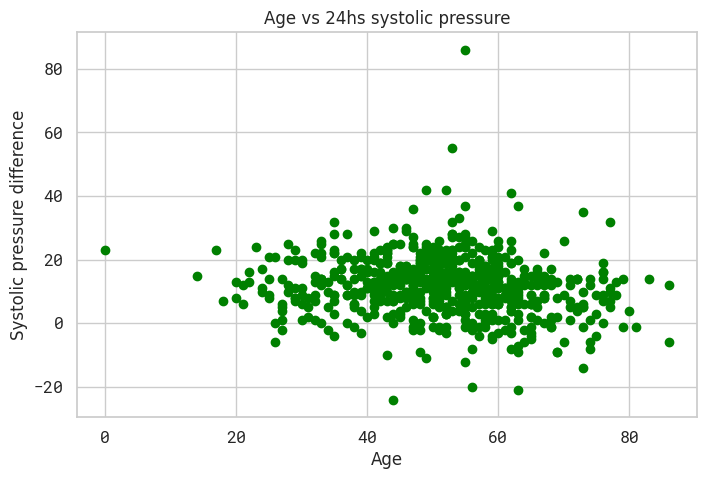

In [29]:
# Scatterplots
sns.set_theme(style="whitegrid")

palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
plt.figure(figsize=(8,5))
plt.scatter(numeric_df['Age'], numeric_df['SP day/night difference'], color='green')
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='8', font=font)
plt.title('Age vs 24hs systolic pressure')
plt.xlabel('Age')
plt.ylabel('Systolic pressure difference')
plt.show()

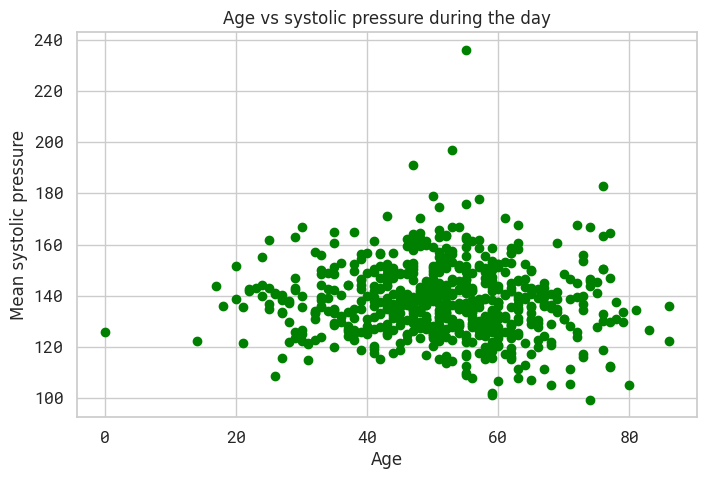

In [30]:
sns.set_theme(style="whitegrid")

palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
plt.figure(figsize=(8,5))
plt.scatter(numeric_df['Age'], numeric_df['Mean SP daytime'], color='green')
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='8', font=font)
plt.title('Age vs systolic pressure during the day')
plt.xlabel('Age')
plt.ylabel('Mean systolic pressure')
plt.show()

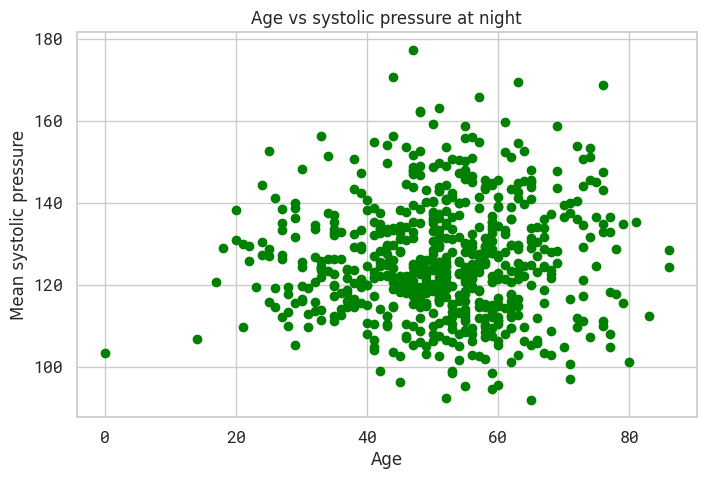

In [31]:
sns.set_theme(style="whitegrid")

palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
plt.figure(figsize=(8,5))
plt.scatter(numeric_df['Age'], numeric_df['Mean SP night time'], color='green')
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='8', font=font)
plt.title('Age vs systolic pressure at night')
plt.xlabel('Age')
plt.ylabel('Mean systolic pressure')
plt.show()

**Boxplots**

Boxplots are graphical representations that provide a quick visual summary of a variable’s distribution, highlighting its central tendency, spread, and variability. They are based on five summary statistics:

*   Minimum
*   First quartile (Q1)
*   Median
*   Third quartile (Q3)
*   Maximum

The box represents the interquartile range (IQR), which is the distance between the first and third quartiles.

The whiskers extend from the box to the minimum and maximum values within the range of 1.5 times the IQR. Any data points outside this range are plotted as outliers.

Boxplots are especially useful for detecting outliers and comparing distributions across groups, helping identify potential anomalies or skewness in the data.


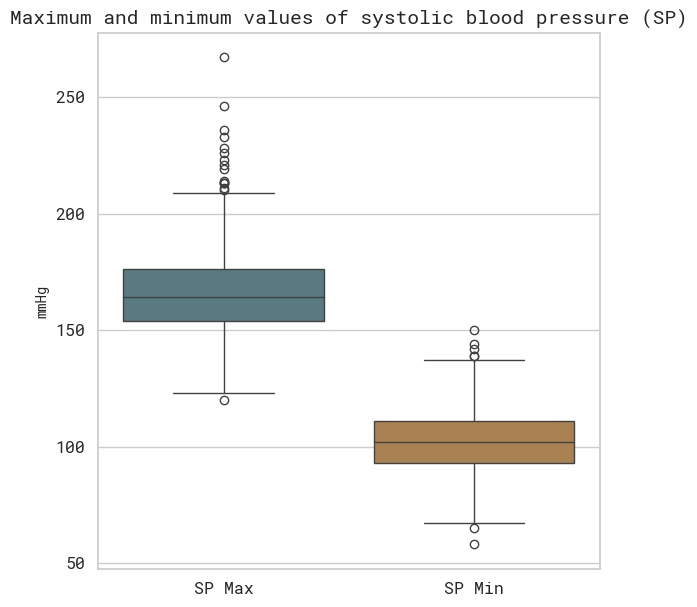

In [32]:
sns.set_theme(style="whitegrid")

palette = get_hex("Acanthisthius_brasilianus", keep_first_n=2)
plt.figure(figsize=(6, 6))
sns.boxplot(data=numeric_df[['SP Max', 'SP Min']], palette=palette)
font = load_google_font('Roboto Mono')
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='6', font=font)
plt.ylabel('mmHg', font=font, fontsize='10')
plt.tight_layout()
plt.title('Maximum and minimum values of systolic blood pressure (SP)', font=font, fontsize='14')
plt.show()

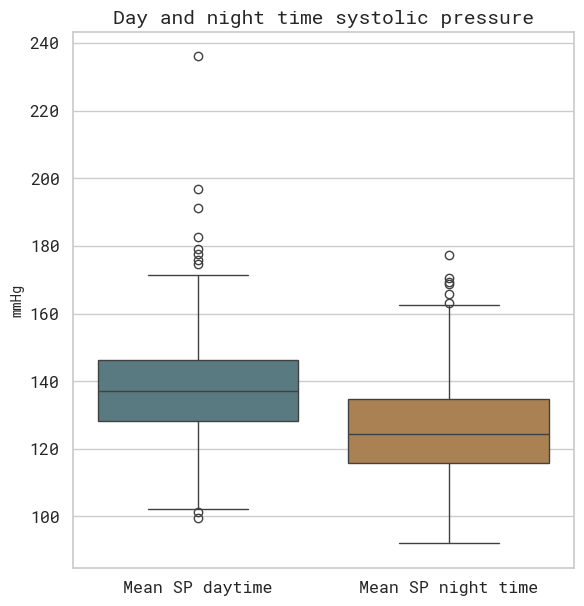

In [33]:
palette = get_hex("Acanthisthius_brasilianus", keep_first_n=5)
plt.figure(figsize=(6, 6))
sns.boxplot(data=numeric_df[['Mean SP daytime', 'Mean SP night time']], palette=palette)
plt.xticks(fontsize='8', font=font)
plt.yticks(fontsize='6', font=font)
plt.ylabel('mmHg', font=font, fontsize='10')
plt.tight_layout()
plt.title('Day and night time systolic pressure', font=font, fontsize='14')
plt.show()

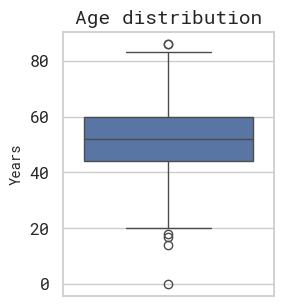

In [34]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=numeric_df[['Age']])
plt.xticks([ ])
plt.yticks(fontsize='6', font=font)
plt.ylabel('Years', font=font, fontsize='10')
plt.tight_layout()
plt.title('Age distribution', font=font, fontsize='14')
plt.show()

In [35]:
# First, calculate the upper and lower limits of the boxplot for Age distribution.

# Calculate 25th percentile of annual strikes
percentile25 = numeric_df['Age'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = numeric_df['Age'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower Age limit is: ', lower_limit)

print('Upper Age limit is: ', upper_limit)

Lower Age limit is:  20.0
Upper Age limit is:  84.0


The lower limit of age distribution is 20 years old. And the upper age limit is 84 years old.

The Age distribution contains several outliers that need to be identified.


In [36]:
# Next, identify those individuals whose age is below and above the age limits (boolean mask).

mask1 = (numeric_df[numeric_df['Age'] < lower_limit])
mask2 = (numeric_df[numeric_df['Age'] > upper_limit])

print(mask1.value_counts())
print(mask2.value_counts())

SP Max  DP w/SP Max  SP Min  DP w/SP Min  Mean SP daytime  Mean Pulse Pressure daytime  Mean SP night time  Mean Pulse Pressure night time  Mean SP  Mean Diastolic Pressure  Mean Pulse Pressure  AASI slope DP/SP regression  Aproximate AASI  Pulse Pressure w/SP Max  Pulse Pressure w/SP Min  SP day/night difference  Pulse Pressure day/night difference  Pulse Pressure of SP Max/Min difference  Sex  Age  IMT right carotide  Diastolic diameter right carotide  IMT left carotide  Diastolic diameter left carotide  Pulse wave velocity(PWV)  Compliance  Mean Pressure  Isobaric compliance  AHT  Tension  AASI daytime  AASI night time  Dipper  Year  Month  Week
142     82           91      59           122.31           53.15                        106.85              48.65                           117.8    65.9                     51.8                 0.24                         0.55             60                       32                       15                        4                         

The Age variable exhibits outliers, specifically four observations are below the lower limit: 0, 14, 17 and 18 years old.
There are also two outliers above the upper limit; both of them are 86 years old.


In [37]:
# These 6 cases will be deleted since the dataset includes mostly adults between
# 40 and 60 years old.

mask_1 = numeric_df['Age'] < lower_limit
mask_2 = numeric_df['Age'] > upper_limit
mask = mask_1 | mask_2
numeric_df = numeric_df[~mask]

In [38]:
# New size of dataframe to work with
# Number of rows and columns
numeric_df.shape

(622, 36)

After removing six age outliers, now the dataframe consists of 622 rows and 36 features.

## **Finding and visualizing missing values**



Missing data can greatly affect the accuracy and reliability of results.

Therefore, detecting and handling it is essential for maintaining a high-quality analysis.



In [39]:
# Identification of columns containing missing values
print("\nColumns that contain missing values:")
print([col for col in numeric_df.columns if numeric_df[col].isnull().any()])




Columns that contain missing values:
['IMT right carotide', 'Diastolic diameter right carotide', 'IMT left carotide', 'Diastolic diameter left carotide', 'Compliance', 'Isobaric compliance', 'Tension']


There are 7 variables with missing data:
- IMT right carotide
- IMT left carotide
- Diastolic diameter right carotide
- Diastolic diameter left carotide
- Compliance
- Isobaric compliance
- Tension


In [40]:
# Here is another way to address which variables contain missing data (and to quantify null values as well).
numeric_df.isna().sum()

,0
SP Max,0
DP w/SP Max,0
SP Min,0
DP w/SP Min,0
Mean SP daytime,0
Mean Pulse Pressure daytime,0
Mean SP night time,0
Mean Pulse Pressure night time,0
Mean SP,0
Mean Diastolic Pressure,0


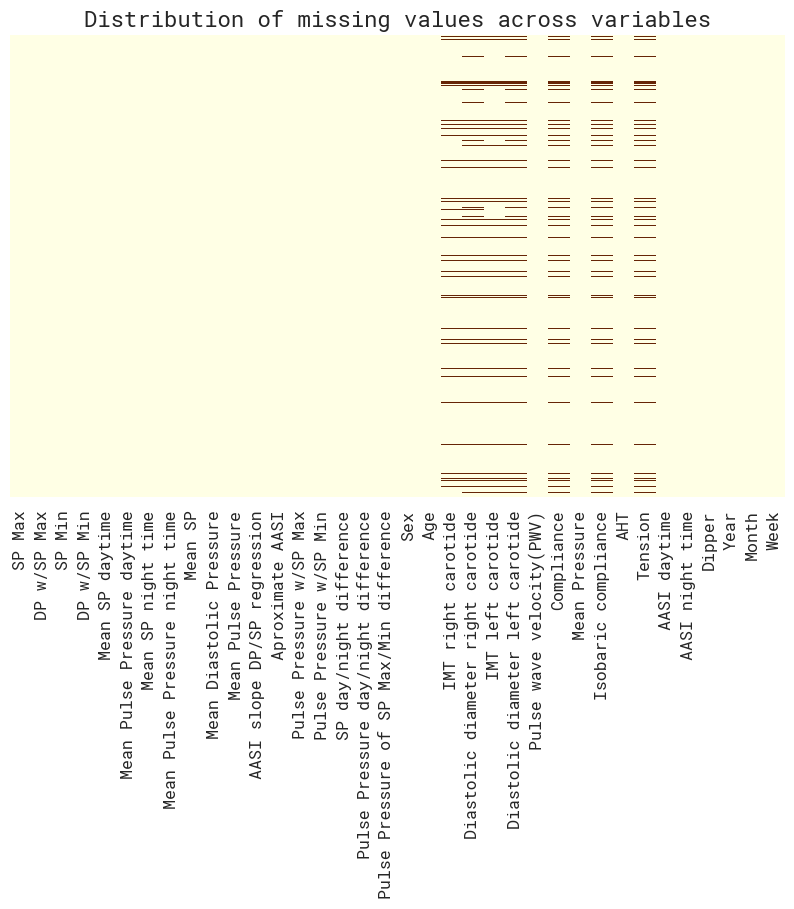

In [41]:
# Visualization of missing values in a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.isnull(), cbar=False, cmap='YlOrBr')
plt.title('Distribution of missing values across variables', font=font, fontsize='16')
plt.xticks(rotation=90, font=font, fontsize='12')
plt.yticks([])
plt.show()

In [42]:
import missingno as msno

A nullity correlation plot is a visualization to identify patterns of missing values and understand the mechanism behind the missingness.

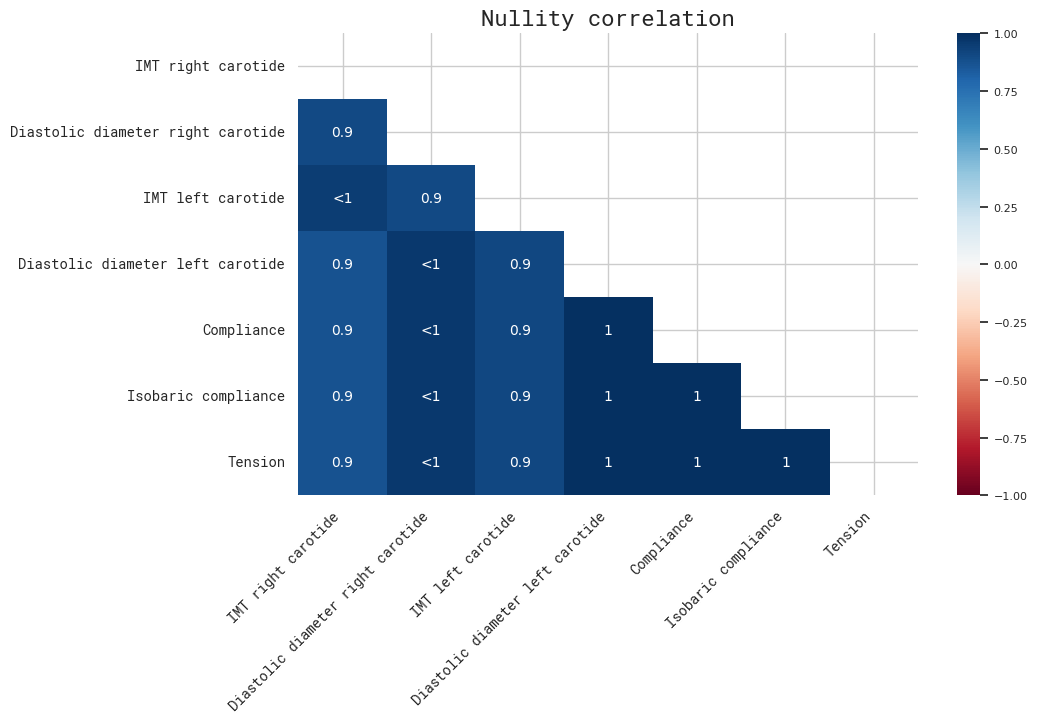

In [43]:
# Nullity correlation

heatmap = msno.heatmap(numeric_df, figsize=(10, 6), fontsize= 12, cbar=True)
plt.title('Nullity correlation', font=font, fontsize='16')
plt.xticks(rotation=45, font=font, fontsize='10')
plt.yticks(font=font, fontsize='10')
cbar = heatmap.figure.axes[-1] # Get the colorbar axis
cbar.tick_params(labelsize=8)
plt.show()

The nullity correlation heatmap shows how strongly the presence or absence of one variable affects the presence of another.


The nullity correlations range from -1 to 1:

* Negative correlation (-1) indicates that if the value of one variable is present, then the value of the other variable is absent.
* No correlation (0) indicates that variables values present or not present have no effect on one another.
* Positive correlation (+1) indicates that if the value of one variable is present, then the value of the other variable is present.

## **Data Imputation**

Instead of just imputing missing values with the mean/median, a multivariate approach such as IterativeImputer will be used: it models each column containing missing values (target variable) as a function of the other features (predictor variables) and uses that estimate for imputation.

This method iteratively predicts the missing values using regression models until the imputations stabilize.



In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
imputer = IterativeImputer(max_iter=10, random_state=0)


In [46]:
imputed_data = imputer.fit_transform(numeric_df)

In [47]:
df2 = pd.DataFrame(imputed_data, columns=numeric_df.columns)

In [48]:
# The cleaned and final version of the dataframe is df2
df2.isna().sum()

,0
SP Max,0
DP w/SP Max,0
SP Min,0
DP w/SP Min,0
Mean SP daytime,0
Mean Pulse Pressure daytime,0
Mean SP night time,0
Mean Pulse Pressure night time,0
Mean SP,0
Mean Diastolic Pressure,0


In [49]:
# Check the correlation of variables (excluding 'Sex', 'Dipper', 'Year', 'Month' and 'Week', since they do not add to the analysis).
# Exclusion of variables Sex, Dipper, Year, Month and Week
selected = df2.iloc[:, list(range(0,18)) + list(range(19,32))]

In [50]:
# Preview of the selected variables of df2 to see correlations.
selected.head(3)

,SP Max,DP w/SP Max,SP Min,DP w/SP Min,Mean SP daytime,Mean Pulse Pressure daytime,Mean SP night time,Mean Pulse Pressure night time,Mean SP,Mean Diastolic Pressure,Mean Pulse Pressure,AASI slope DP/SP regression,Aproximate AASI,Pulse Pressure w/SP Max,Pulse Pressure w/SP Min,SP day/night difference,Pulse Pressure day/night difference,Pulse Pressure of SP Max/Min difference,Age,IMT right carotide,Diastolic diameter right carotide,IMT left carotide,Diastolic diameter left carotide,Pulse wave velocity(PWV),Compliance,Mean Pressure,Isobaric compliance,AHT,Tension,AASI daytime,AASI night time
0,153.0,83.0,88.0,48.0,116.23,40.41,112.23,42.31,114.7,73.6,41.1,0.44,0.46,70.0,40.0,4.0,-2.0,30.0,62.0,0.47000,4.960000,0.530000,4.890000,10.30,3.070000,87.3,2.680000,0.0,402.890000,0.64,0.32
1,173.0,103.0,110.0,76.0,133.64,46.32,122.08,45.42,129.7,83.7,46.0,0.39,0.57,70.0,34.0,12.0,1.0,36.0,55.0,0.57213,6.506678,0.609609,6.390802,11.22,4.071503,99.0,3.938898,1.0,528.637365,0.43,0.59
2,163.0,95.0,101.0,64.0,130.88,41.79,120.00,40.32,127.0,85.7,41.3,0.52,0.50,68.0,37.0,11.0,1.0,31.0,40.0,0.42000,5.720000,0.470000,5.260000,7.84,5.710000,99.5,5.680000,1.0,556.620000,0.81,0.25


In [51]:
corr_matrix = selected.corr()

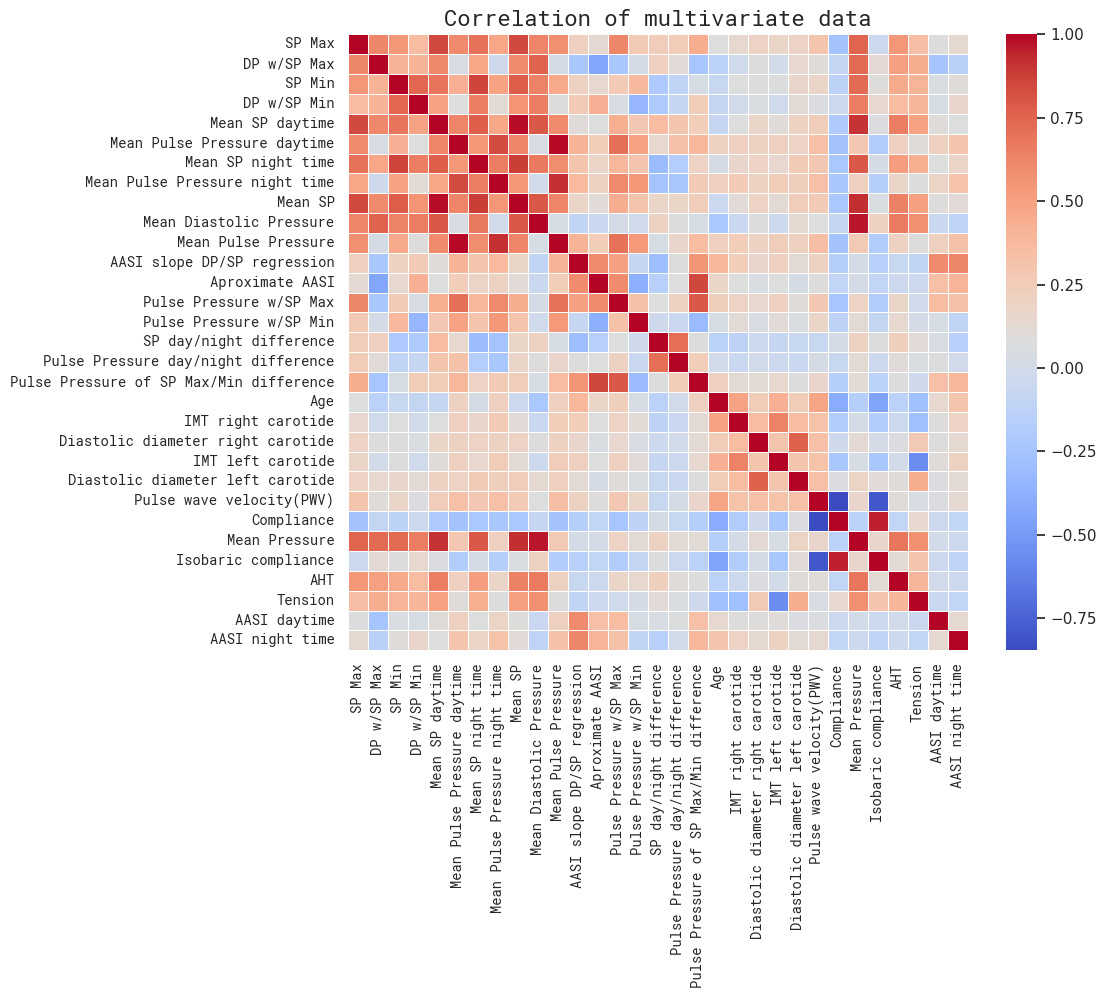

In [52]:
# Heatmap visualization of correlated variables
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of multivariate data', font=font, fontsize='16')
plt.xticks(font=font, fontsize='10')
plt.yticks(font=font, fontsize='10')
plt.show()

There are positive and negative correlations among several variables. One quick example refers to **Pulse wave velocity (PWV)** and **Isobaric compliance**: PWV and arterial compliance are inversely related; higher PWV indicates stiffer, less compliant arteries, while lower PWV suggests more elastic and compliant arteries.

PWV, the speed of a pressure wave in arteries, is used to assess arterial stiffness, a condition where arteries lose their ability to stretch and recoil. A more compliant artery can expand more during systole and recoil more during diastole, resulting in a slower pulse wave.

Reference: https://www.sciencedirect.com/topics/medicine-and-dentistry/pulse-wave-velocity



In [53]:
# Download the cleaned version of the dataframe (df2) as a csv file

from google.colab import files
df2.to_csv("HTA_df2.csv", index=False)
files.download("HTA_df2.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Key insights**

The exploratory data analysis ensured data quality and interpretability by removing irrelevant features, standardizing column names, and transforming date variables into meaningful components. Missing values were imputed to preserve completeness, and age outliers were excluded to maintain consistency. No duplicates were detected. The analysis revealed distinct hypertension patterns between dipper and nondipper patients, with systolic and diastolic profiles showing age-related trends. With a clean and consistent dataset, the next phase will focus on feature engineering, preprocessing (scaling, encoding), and developing machine learning models to predict dipper/nondipper status and hypertension risk.